# Chapter 8: Planning and Learning with Tabular Methods

- Model-based methods rely on *planning*
- Model-free methods rely on *learning*

## 8.1: Models and Planning

- A model is anything an agent can use to predict how the environment will respond to its actions.
- If the  model produces a description of all possibilities and their corresponding probabilities, it's a *distribution model*. 
- Other models may just produce one possibility, sampled according to the probabilities, these are known as *sample models*.
- Models used in Dynamic programming are distribution models.
- Sample models are the models that we've been using in our model-free methods, like Monte Carlo and TD, they're essentially experience. So model-free does not neceessarily mean no model is used. It's just not used by the agent.
- Distribution models are stronger, they can be used to produce samples
- In practice it's typically easier to get sample models than distribution models.

Models can be used to simulate experience. For example we can use a sample model to generate an episode, or a distribution model to simulate all possible episodes. In these cases we're using a model to *simulate* the environment and produce *simulated experience*.

- *Planning* in RL is used to refer to any computational process that takes a model as input and outputs or improves apon a policy for interacting with that modeled environment.

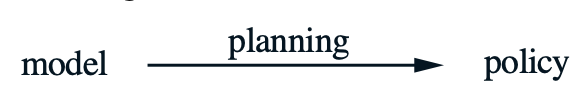

There are two types of planning in AI. There's *State-space planning* and *plan-space planning*. State-space planning is the type of planning we've done so far, searching through the state space for an optimal policy or the optimal path to a goal. Plan-space methods include evolutionary method and "partial-order planning", however these are difficult to apply efficiently to stoachstic sequential decision problems that we focus on in RL, so these aren't the focus of this kind of RL.

Sutton and Barto see that all state-space planning methods share a common structure. It follows from two basic ideas:

1. All state-space planning methods involve computing value functions as a key intermediate step toward improving a policy
2. They compute value functions by updates or backup operations applied to simulated experience.

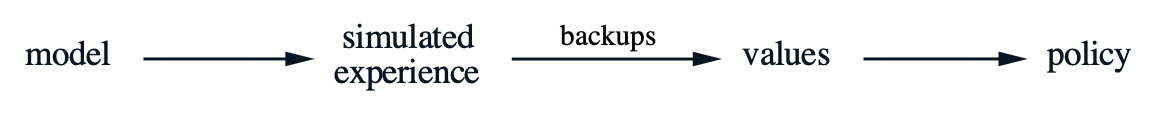

This might be a confusing to see at first for DP because we don't use actual experience like in TD or Monte Carlo, but as per the definition of simulated experience from before it actually does use it. It just does it differently. It uses the distribution model to sweep over all possible transitions to compute a back-up value and then bases the policy on that value.



So I seemed to have some confusion. This above framework is specifically for planning methods, not all methods RL methods we've learnt. Also Monte Carlo and TD methods indeed do not use models at all, by their environment may. The book mentions that in chapter 5, the blackjack example used a sample model, but this was likely referring to the environment rather than the method itself.

- Many of the core ideas can be transferred between planning and learning methods. On key example is that the update step is often very simillar between the two methods and can even be substituted for one another.
- Real experience refers to when the agent directly interacts with the environment. Simulated experience is when the agent produces experience using a model.


Here we have a simple planninng method that's based on one-step tabular Q-learning and on random samples from a sample model. It's known as *random-sample one-step tabular Q-planning*, it converges to the optimal policy for the model under the same conditions as one-step tabular Q-learning. 

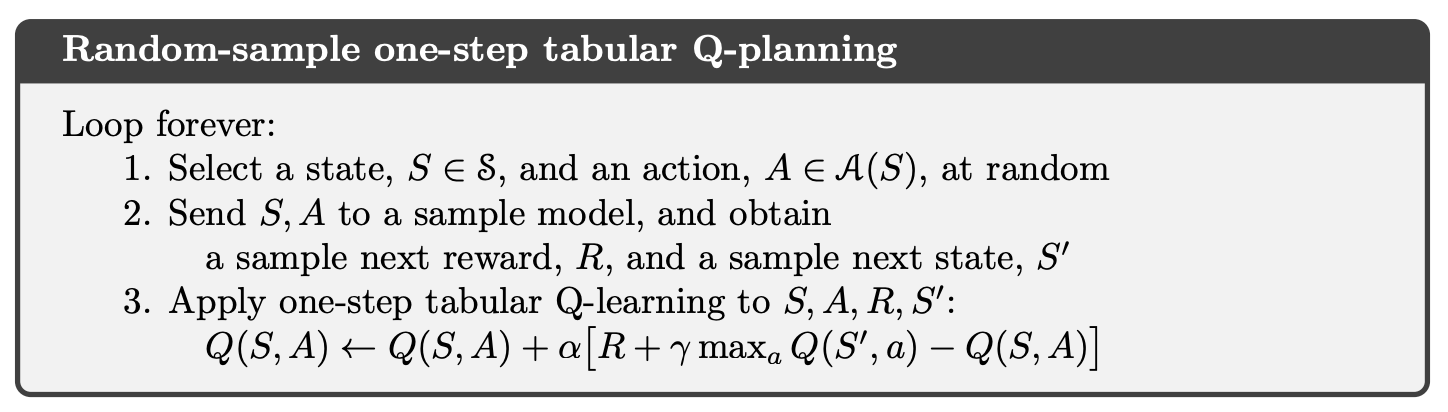

## 8.2 Dyna: Integrated Planning, Acting, and Learning

- Planning online can cause a number of interesting issues to arise. 
- If decision make and model learning are both computational expensive, then it should be divided between them. 

Dyna-Q is presented here. It's a simple architecture that integrates the major functions needed in an online planning agent. Each of the functions are quite simple. 

From the perspective of a planning agent, real experience plays two roles. It can be used to improve the model (make it more accurate to the real environment), and can be used to directly improve the value function and policy (like how we did in methods). The former use is konwn as *model-learning* and the latter is *direct reinforcement learning* (direct RL).

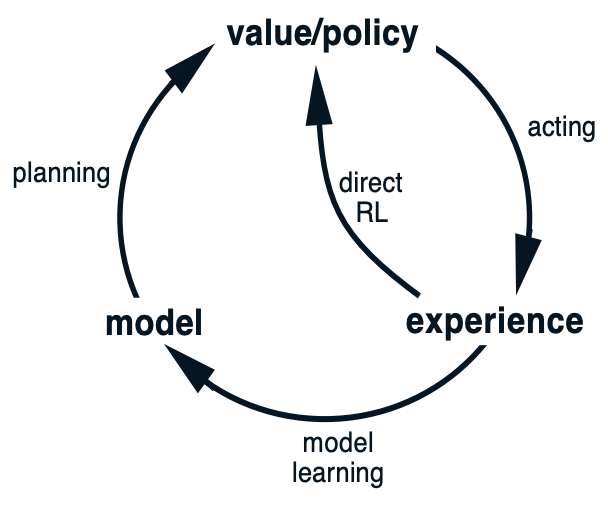

- Using experience to improve the model is also known as *indirect reinforcement learning*.

Both direct and indirect RL have their benefits and disadvantages. 
- Indirect methods tend to get more value out of experience and so achieve a better policy with fewer enviornment interaction.
- Direct methods are simpler and aren't affect by biases in the model.

For a simple of example of a full Dyna-Q process, we can think of the random-sample one-step tabular Q-planning as the planning method, then Direct RL would be one-step tabular q-learning. Model-learning would also be tabular based but assumes the environment is determinstic. After each transition, the model would record that subsequent reward and state for the prior state and action. So then if the model is queried with that same prior state-action pair, it will just return the last observed next state and reward. During the planning step, the Q-planning algorithm only samples from state-action pairs that have been observed and won't be queried for pairs that it has not observed before and thus has no information about.

Of coures Dyna is not limited to just Dyna-Q, the overall architecture for any Dyna type agent is given in the following:

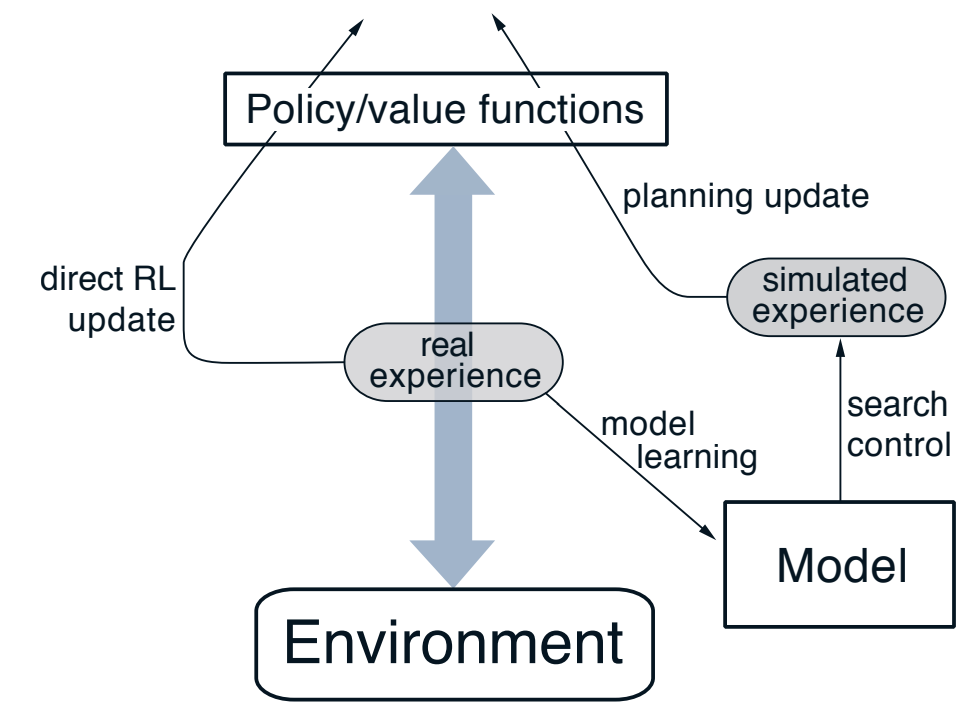

The term *search control* refers to the process that selects the starting states and actions for the simulated experience generated by the model. Planning is achieved here by applying reinforcement learning to the simulated experience generated by the model, just as if they were real. Typically in Dyna models, the same reinforcement learning method is used for learning from real and simulated experience. 

It's interesting to note that Learning and planning share almost all the same "machinery", only differing in where they source their experience.

Thereotically, planning, model-learning, acting and direct RL occur simultaneously and in parallel for Dyna agents. However for implementations on a classical computer, we specify the order within a time step. 
Acting, model-learning and direct RL processes typically required only a tiny amount of computation, we it's assumed they consume only a tiny part of the time. The remaining time is devoted to the planning process, which is inherently computationally expensive. 

So we assume we can complete n iterations of the Q-planning algorithm after we've done our acting, model-learning and direct RL for each timestep. Here we have the pseudocode for Dyna-Q:

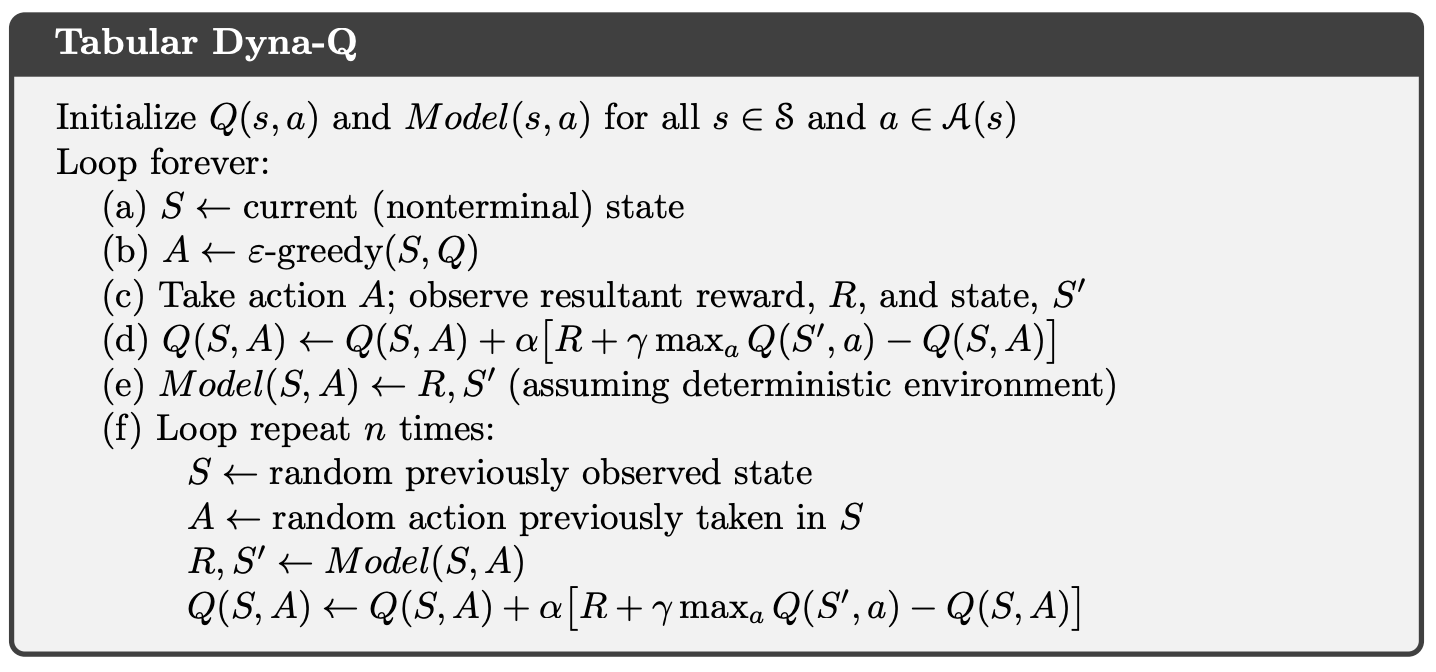

Where Model(s, a) denotes the predicted next state and reward for the state action pair (s, a). Steps (d), (e) and (f) are for Direct RL, Model learning and planning respectively. If we didn't incldue (e) and (f), this would be the same as one-step tabular Q-learning. 

Exercise 8.

Yes using a multi-step bootstrapping method would likely do better. This is because we'd be updating the last n states before the terminal with useful information rather than just the last state because they'd be updated using a return the includes the reward for the final transition. I don't believe it would do nearly as well as Dyna however in terms of getting hte optimal policy quickly. This is because while we'll have a much deeper update for n-step methods, they won't be as good as the updates given my many steps of planning. Potentially multi-step bootstrapping may do as well as Dyna if n for planning was low.

## 8.3 When the Model is Wrong

- We can't expect the model to have complete, correct information (in general). 
- The enviornment may be stochastic and only a limited number of samples has been observed. Or maybe the model was using function approximation and did not generalise perfectly. Or maybe the environment just changed and the new behaviour hasn't been observed. 
- So when the model is incorrect, planning will likely compute a suboptimal policy

- In some cases the suboptimal policy may actually lead to the discovery and correction of hte modeling error. This typically occurs when the model is optimistic in terms of predicting the greater rewards or better transitions than actually possilbe. Our suboptimal policy wants to exploit these, but finds out they do not exist.

Exploration vs Exploitation is a bit different in planning. Here, exploration means taking actions to try and improve the model, whereas exploitation refers to behaving in a way that's optimal to the current model.

So we want the agent to explore so it finds changes in the environment but not so much that was hurt performance greatly. There is no perfect and practical solutions, but we can use simple heuristics.



An example of a heuristic is in Dyna-Q+, which was tested on the gridworld exampls where an obstacle imoved in such a way to where a faster route is opened and so a higher cumulative reward is possible. 

Our heuristic here is a bonus reward that's given to simulated transitions that have not been tested with a real interaction in a long time. This is modelled by having the modelled reward be $r+k\sqrt{\tau}$. Where $\tau$ is the timesteps since the last update and $k$ is some small value. This encourages our agent to keep testing all accessible state transititons.

Exercise 8.2

This is likely due to Dyna-Q+ exploring more in the beginning, when that extra bonus is relatively larger, so it will go and check transitions that haven't been tried in a while. It might also have to do with the other changes to Dyna-Q+, but that's less likely.

Exercise 8.3

This is likely due to Dyna-Q+ trying some exploration moves that don't payoff because the model is accurate. But then when it's not accurate it performs much better because it's better at making it more accurate than regular Dyna-Q.

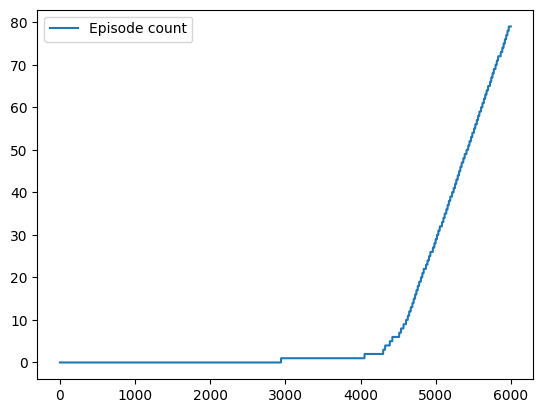

In [302]:
# Exerise 8.4
import numpy as np
import random
import matplotlib.pyplot as plt
import math

class GridWorld:
    def __init__(self, mode: str):
        self.gridworld = np.zeros((6, 9), dtype=np.int8)
        self.x_lim, self.y_lim = 6, 9
        self.start, self.end = np.array([5, 4]), np.array([0, 8])
        self.pos = self.start.copy()
        self.actions = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])

        if mode=="blocking":
            self.gridworld[3, :-1] = 1
        elif mode=="shortcut":
            self.gridworld[3, 1:] = 1
    
    def step(self, a_idx: int) -> tuple[np.array, int]:
        reward = 0
        self.old_pos = self.pos.copy()
        self.pos += self.actions[a_idx][0]

        # Check bounds
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1

        # Check walls
        if self.gridworld[*self.pos]==1:
            self.pos=self.old_pos

        # Check end
        if (self.pos==self.end).all():
            reward = 1

        return (self.pos.copy(), reward) # Return next state, reward
    
    def reset(self):
        self.pos = self.start.copy()

    def get_state(self):
        return self.pos.copy()

    def open_shortcut(self):
        self.gridworld[3, 8] = 0

    def switch_opening(self):
        self.gridworld[3, -1] = 1
        self.gridworld[3, 0] = 0


def pick_action(q_values: np.array, epsilon: float, actions: list, tau: np.array, k: float) -> int:
    action_dist = np.zeros(4, dtype=np.float64)

    #q_values = q_values.copy() + k * np.sqrt(tau)
    max_a = np.argmax(q_values)

    if all(x == q_values[0] for x in q_values):
        max_a = random.randint(0, 3)

    action_dist[max_a] = 1 - epsilon
    action_dist[:] += epsilon/4

    return np.random.choice(actions, 1, p=action_dist)


def dyna_q(env: GridWorld, max_timesteps: int, gamma: float, 
            alpha: float, epsilon: float, n: int, k: float):
    q_values = np.zeros((6, 9, 4), dtype=np.float64)
    tau = np.zeros((6, 9, 4), dtype=np.int16)
    model = {}
    timestep = 0
    actions = np.array([0, 1, 2, 3])
    ep_count = 0
    ep_count_hist = []

    while timestep < max_timesteps:
        s = env.get_state()
        in_episode = True

        while in_episode and timestep < max_timesteps:
            """
            if timestep == 3000:
                print(env.gridworld)
                env.open_shortcut()
                print(env.gridworld)
            """
            
            tau[:] += 1

            a = pick_action(q_values[*s], epsilon, actions, tau[*s], k)
            s_n, r = env.step(a)
            q_values[*s, a] += alpha * (r + gamma * np.max(q_values[*s_n]) - q_values[*s, a])
            model[(tuple(s.tolist()), a.item())] = (r, list(s_n))
            tau[*s, a] = 0

            for _ in range(n):
                s_p, a_p = list(model.keys())[random.randint(0, len(model)-1)]
                r_p, s_n_p = model[(s_p, a_p)]
                r_p += k * math.sqrt(tau[*s_p, a_p].item())
                q_values[*s_p, a_p] += alpha * (r_p + gamma * np.max(q_values[*s_n_p]) - q_values[*s_p, a_p])

            if r == 1:
                env.reset()
                ep_count += 1
                in_episode = False

            s = s_n
            timestep += 1
            ep_count_hist.append(ep_count)

    return ep_count_hist

environment = GridWorld("shortcut")
MAX_TIMESTEPS = 6000
GAMMA = 0.95
ALPHA = 0.10
EPSILON = 0.1
n = 10
k = 0.001

ep_count_hist = dyna_q(environment, MAX_TIMESTEPS, GAMMA, ALPHA, EPSILON, n, k)

plt.plot(ep_count_hist, label="Episode count")
plt.legend()
plt.show()

# Using the bonus reward in the action selection rather than the q-value updates does seem to work, and it seems to have less variance.
# The variance seems greatly reduce, it more consistently improves performance.
# The regular version is extremely variant to changes in the hyperparameters

Exercise 8.5

We'd modify the model to be stochastic too. In the implementation on 164, the model isdeterminstic and given a state and action, will always return the saem next state and reward. So we'd need to modify our model so it's also stochastic. A sample model based approach for this would be keeping track of the number of times of each possible reward and next state for each state-action pair. Then when we go to simulated experience we'd sample from the model based on the number of times we'd seen each next state and reward.

A problem with this in changing environemnts is because we're keeping track of the number of times we've encountered a next state and reward, the model will likely bias to the old environment and so would be inaccurate. This might be ok if the envioronment changes rarely, but it'd likely perform poorly on a constantly changing environment because the model would always be off. 

To handle changing environments as well as handling stochasticity, we'd need some way to keep the model up-to-date with the real dynamics of the environment. one naive approach could be to periodically decrease the counts for the subsequent states and reward. So if we don't see a subsequent state and reward for a long time, the model would "unlearn" this return. This would likely be something that would require some tweaking, as you could have some parameter, j, that for each j timesteps, we decrement all counts in the model by 1.

We also need to take into account how we'd do the updates with multiple possible rewards for each state-action pair. This would actually be pretty simple, we'd just use the expected reward, so weighting each reward based on the probability of getting them (based on our counts). A problem with this is that it may not be very efficient when there's lots of unlikely transitions, which would slow our expected reward calculation.

## 8.4 Prioritised Sweeping

- Uniform sampling of the model is typically not the best.
- Planning is more efficient if we focus on the important state-action pairs
- The idea of *prioritised sweeping* is to prioritise updates based on a level of urgency and perform them based on this priority.
- A queue is maintained of every state-action pair whose estimated value would change nontrivially if updated, prioritised by the size of the change/
- When our biggest change is computed, the effect on its predecessors are computed.
- So if the change is bigger than some small threshold, the pair is inserted into the priority queue. If the pair is already in the queue, then it's just moved up in priority. 

We see the full algorithm here:

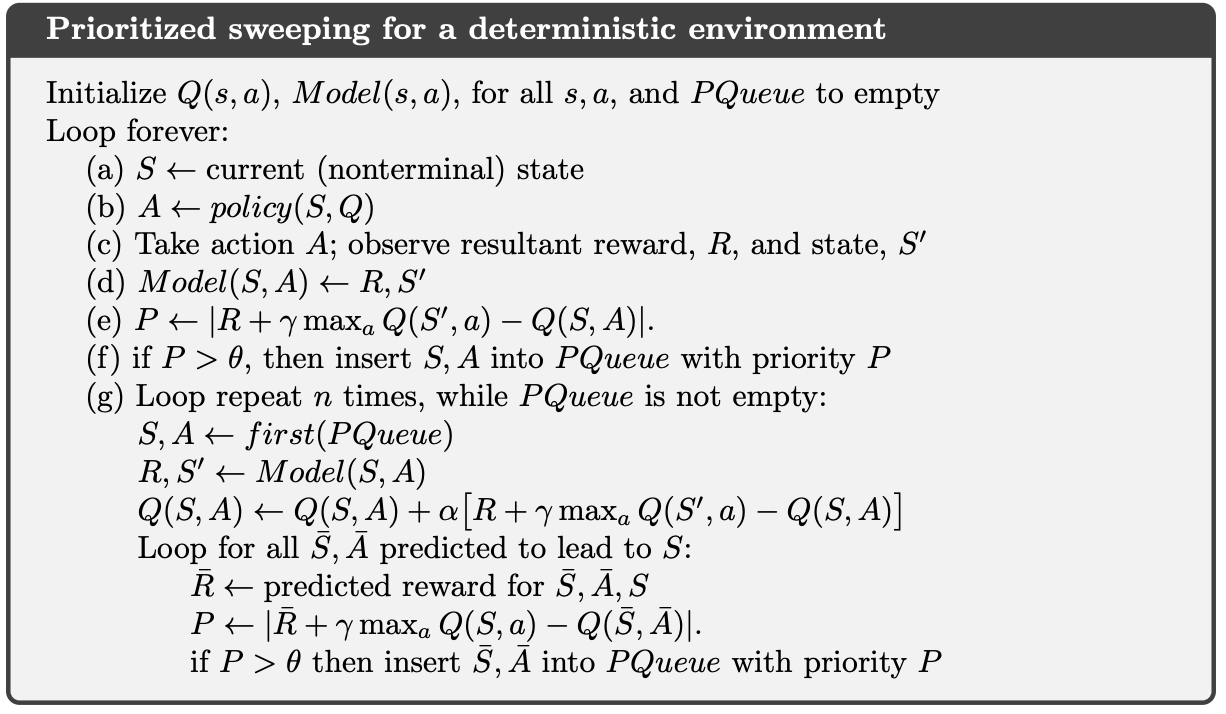

- *Forward focusing* is another strategy for planning where we focus on states that are easy to get to based on states that are frequently visited by the current policy.

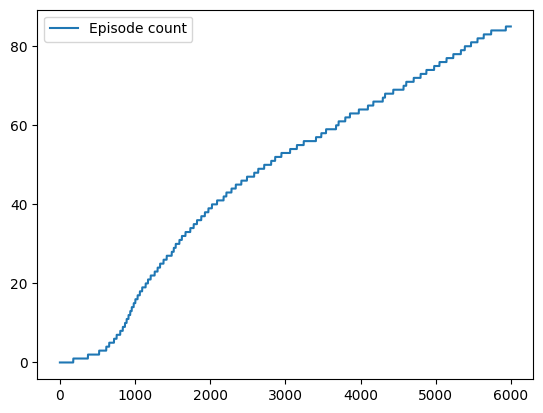

In [412]:
# Prioritised Sweeping Gridworld example
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from heapq import heappush, heappop

class GridWorld:
    def __init__(self, mode: str):
        self.gridworld = np.zeros((6, 9), dtype=np.int8)
        self.x_lim, self.y_lim = 6, 9
        self.start, self.end = np.array([5, 4]), np.array([0, 8])
        self.pos = self.start.copy()
        self.actions = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])

        if mode=="blocking":
            self.gridworld[3, :-1] = 1
        elif mode=="shortcut":
            self.gridworld[3, 1:] = 1
    
    def step(self, a_idx: int) -> tuple[np.array, int]:
        reward = 0
        self.old_pos = self.pos.copy()
        self.pos += self.actions[a_idx][0]

        # Check bounds
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1

        # Check walls
        if self.gridworld[*self.pos]==1:
            self.pos=self.old_pos

        # Check end
        if (self.pos==self.end).all():
            reward = 1

        return (self.pos.copy(), reward) # Return next state, reward
    
    def reset(self):
        self.pos = self.start.copy()

    def get_state(self):
        return self.pos.copy()

    def open_shortcut(self):
        self.gridworld[3, 8] = 0

    def switch_opening(self):
        self.gridworld[3, -1] = 1
        self.gridworld[3, 0] = 0


def pick_action(q_values: np.array, epsilon: float, actions: list, tau: np.array, k: float) -> int:
    action_dist = np.zeros(4, dtype=np.float64)
    q_values = q_values.copy() + k * np.sqrt(tau)

    max_a = np.argmax(q_values)

    if all(x == q_values[0] for x in q_values):
        max_a = random.randint(0, 3)

    action_dist[max_a] = 1 - epsilon
    action_dist[:] += epsilon/4

    return np.random.choice(actions, 1, p=action_dist)


def prioritisted_dyna_q(env: GridWorld, max_timesteps: int, gamma: float, 
            alpha: float, epsilon: float, n: int, theta: float=1e-3, k: float=0.001):
    q_values = np.zeros((6, 9, 4), dtype=np.float64)
    tau = np.zeros((6, 9, 4), dtype=np.int16)
    model = {}
    timestep = 0
    actions = np.array([0, 1, 2, 3])
    ep_count = 0
    ep_count_hist = []
    pqueue = []

    while timestep < max_timesteps:
        s = env.get_state()
        in_episode = True

        while in_episode and timestep < max_timesteps:
            tau[:] += 1
            if timestep == 3000:
                env.open_shortcut()

            a = pick_action(q_values[*s], epsilon, actions, tau[*s], k)
            s_n, r = env.step(a)
            model[(tuple(s.tolist()), a.item())] = (r, tuple(s_n.tolist()))
            p = abs(r + gamma * np.max(q_values[*s_n]) - q_values[*s, a]).item()
            if p > theta: 
                heappush(pqueue, (-p, (tuple(s.tolist()), a.item())))

            tau[*s, a] = 0    
            
            for _ in range(n):
                if pqueue:
                    _, (s_p, a_p) = heappop(pqueue)
                    r_p, s_n_p = model[(s_p, a_p)]
                    q_values[*s_p, a_p] += alpha * (r_p + gamma * np.max(q_values[*s_n_p]) - q_values[*s_p, a_p])
                    for s_a in model.keys():
                        if model[s_a][1] == s_p:
                            r_p = model[s_a][0]
                            p_p = abs(r_p + gamma * np.max(q_values[*s_p])-q_values[*s_a[0], s_a[-1]]).item()
                            if p_p > theta:
                                heappush(pqueue, (-p_p, (s_a)))

            if r == 1:
                env.reset()
                ep_count += 1
                in_episode = False

            s = s_n
            timestep += 1
            ep_count_hist.append(ep_count)

    return ep_count_hist

environment = GridWorld("shortcut")
MAX_TIMESTEPS = 6000
GAMMA = 0.99
ALPHA = 0.15
EPSILON = 0.1
n = 25
theta = 0.001
k = 0.005

ep_count_hist = prioritisted_dyna_q(environment, MAX_TIMESTEPS, GAMMA, ALPHA, EPSILON, n, theta, k)

plt.plot(ep_count_hist, label="Episode count")
plt.legend()
plt.show()

# Much less variance than regular Dyna-Q, this suggestst the high variance is from the random sampling during the planning step

## 8.5 Expected Vs. Sample Updates

We have many types of updates RL as we've seen throughout the book. In Dyna-Q we can pick any one of these updates to use. But each has their differences. The best typically comes down to a tradeoff between accuracy and speed. Sample updates are typically much faster than expected updates.

Let's say we have a branching factor b, that determines how many subsequent states there are for a given state-action pair. An expected update here would take 1b, while a sample update would take a constant amount of time. However the expected update would be more accurate and less variant while the sampel update could be noisy and inaccurate. 

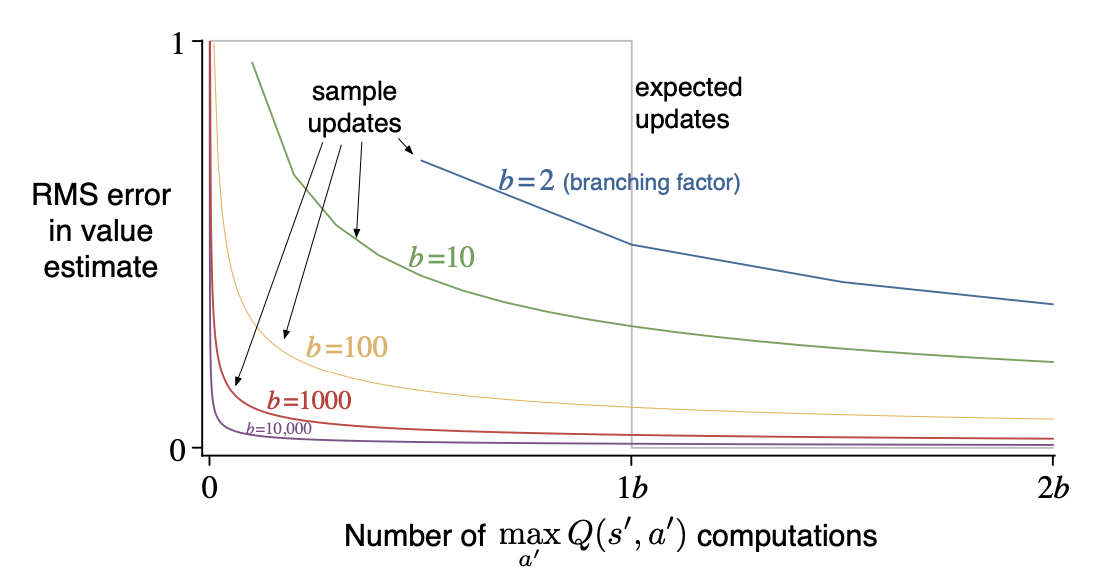

We can clearly see the tradeoff in the above image. It shows us that sample updates tend to perform much better in terms of speed than expected updates if the branching factor is high. The above figure also has the true values for each of the subsequent states which gives expected updates a bit more power. Realistically this won't be the case, and that helps the case for sample updates because they more quickly update, and so give more accurate values sooner. 

So overall, sample updates are generally better than expected updates when there is a large stochastic branching factor.

Exercise 8.6

This would likely strengthen the case for sample updates. This is because this skewing would not affect the computational complexity. So expected updates would still take 1b steps. Expected updates also gives an equal amount of computation to the branches that are very unlikely. This is comparison to sample-updates, which would disproportionally update the values based on the more important values, which would be a good thing here as it would get closer to the true value due to values with higher weights being sampled more often.

## 8.6 Trajectory Sampling